# Exploratory Data Analysis (EDA)

I'll perform some exploratory data analysis to understand the dataset. We'll load the data, visualize some basic statistics, and explore the spectral data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_excel('Measured_value+Raw_spectral_data (only full dataset).xlsx')

In [3]:
# Display basic statistics
print(data.describe())

               MC     sensor1     sensor2     sensor3     sensor4     sensor5  \
count  136.000000  136.000000  136.000000  136.000000  136.000000  136.000000   
mean     0.055522    0.304855    0.303235    0.301668    0.300149    0.298669   
std      0.014847    0.049070    0.048891    0.048710    0.048529    0.048349   
min      0.011950    0.250913    0.249646    0.248432    0.247265    0.246136   
25%      0.045325    0.273159    0.271652    0.270200    0.268804    0.267452   
50%      0.051575    0.287254    0.285672    0.284143    0.282663    0.281224   
75%      0.066738    0.323995    0.322355    0.320768    0.319214    0.317670   
max      0.099150    0.498106    0.495827    0.493584    0.491388    0.489234   

          sensor6     sensor7     sensor8     sensor9  ...   sensor851  \
count  136.000000  136.000000  136.000000  136.000000  ...  136.000000   
mean     0.297220    0.295794    0.294387    0.292995  ...    1.509597   
std      0.048170    0.047989    0.047807    0.0

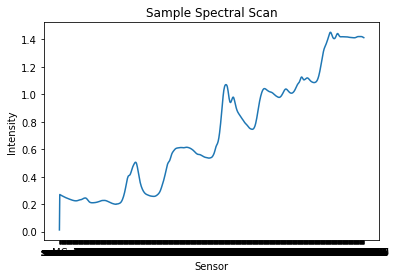

In [4]:
# Visualize a sample scan
sample_scan = data.iloc[0, 1:-1]
plt.plot(sample_scan)
plt.title('Sample Spectral Scan')
plt.xlabel('Sensor')
plt.ylabel('Intensity')
plt.show()

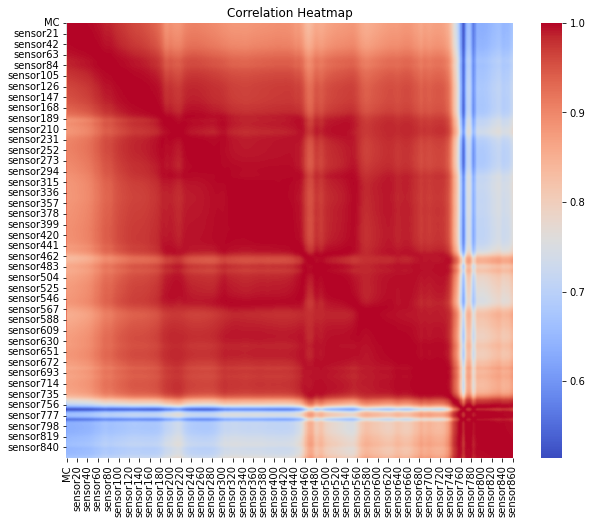

In [5]:
# Visualize correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Unsupervised Learning

 I used Principal Component Analysis (PCA) to reduce the dimensionality of the data and visualize the principal components.

In [6]:
from sklearn.decomposition import PCA

In [7]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data.iloc[:, 1:-1])

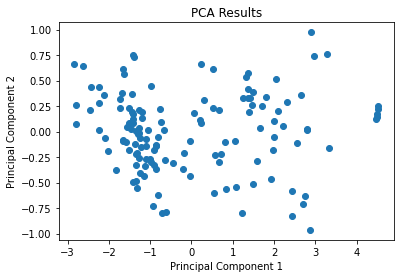

In [8]:
# Plot PCA results
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Feature Engineering

I useed feature importance from an ensemble model (e.g., Random Forest) to select important features and reduce dimensionality

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Separate features and target variable
X = data.iloc[:, 1:-1]
y = data['MC']

In [11]:
# Fit Random Forest to get feature importances
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [12]:
# Get feature importances
feature_importances = rf.feature_importances_

In [13]:
# Sort and select top features
sorted_idx = np.argsort(feature_importances)[::-1]
top_features = sorted_idx[:50]

In [14]:
# Select top features
X_selected = X.iloc[:, top_features]

# Regression Model

I use Partial Least Squares (PLS) Regression for modeling the moisture content

In [15]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [17]:
# Initialize and fit PLS regression model
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)

PLSRegression(n_components=10)

In [18]:
# Predict on test set
y_pred = pls.predict(X_test)

In [19]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 6.139711244215794e-06
